In [2]:
import pandas as pd
bank_df_full = pd.read_csv('bank_df_full.csv')
bank_df_full.head(10)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,secondary,tertiary,unknown.1,cellular,telephone,unknown.2,failure,other,success,unknown.3
0,30,0,1787,0,0,19,10,79,1,-1,...,False,False,False,True,False,False,False,False,False,True
1,33,0,4789,1,1,11,5,220,1,339,...,True,False,False,True,False,False,True,False,False,False
2,35,0,1350,1,0,16,4,185,1,330,...,False,True,False,True,False,False,True,False,False,False
3,30,0,1476,1,1,3,6,199,4,-1,...,False,True,False,False,False,True,False,False,False,True
4,59,0,0,1,0,5,5,226,1,-1,...,True,False,False,False,False,True,False,False,False,True
5,35,0,747,0,0,23,2,141,2,176,...,False,True,False,True,False,False,True,False,False,False
6,36,0,307,1,0,14,5,341,1,330,...,False,True,False,True,False,False,False,True,False,False
7,39,0,147,1,0,6,5,151,2,-1,...,True,False,False,True,False,False,False,False,False,True
8,41,0,221,1,0,14,5,57,2,-1,...,False,True,False,False,False,True,False,False,False,True
9,43,0,-88,1,1,17,4,313,1,147,...,False,False,False,True,False,False,True,False,False,False


# KNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

sc = StandardScaler()
ros = RandomOverSampler(random_state = 42)

X = bank_df_full.drop("y", axis = 1)
y = bank_df_full["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#X_train, y_train = ros.fit_resample(X_train, y_train)
# Oversampling causes the best knn neighbors = 1
# This may lead to underfitting/overfitting

In [4]:
def best_knn_score(neighbors: int) -> str:
    """
    This returns the best knn score along with the number of neighbors. It loops
    through user's choice of number neighbors and gives the best one.
    """
    best_score = 0
    best_neighbors = 0 
    for n in range(1, neighbors):
        knn = KNeighborsClassifier(n_neighbors = n)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)

        if (score > best_score):
            best_score = score
            best_neighbors = n
    
    result = f"The best knn score is {best_score} with {best_neighbors} neighbors."
    return result
best_knn_score(100)


'The best knn score is 0.8894620486366986 with 79 neighbors.'

In [5]:
knn = KNeighborsClassifier(n_neighbors = 79)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(y_pred)
print(type(y_pred))

[0 0 0 ... 0 0 0]
<class 'numpy.ndarray'>


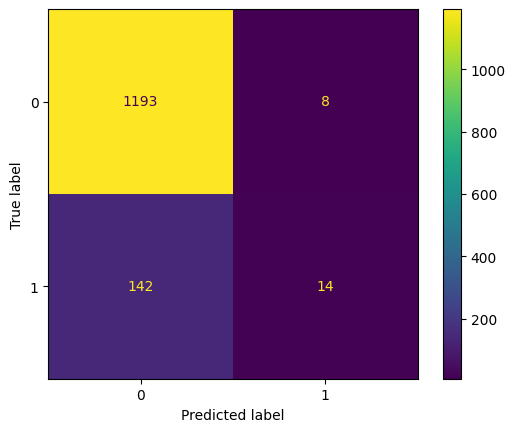

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

In [7]:
# Oversampling caused the accuracy to decrease
# Oversampling accuracy = 85%
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1201
           1       0.64      0.09      0.16       156

    accuracy                           0.89      1357
   macro avg       0.76      0.54      0.55      1357
weighted avg       0.86      0.89      0.85      1357



# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

X = bank_df_full.drop("y", axis = 1)
y = bank_df_full["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#X_train, y_train = ros.fit_resample(X_train, y_train)

In [9]:
regression = LogisticRegression(random_state = 42).fit(X_train, y_train)
y_pred = regression.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [10]:
regression.score(X_test, y_test)

0.8975681650700074

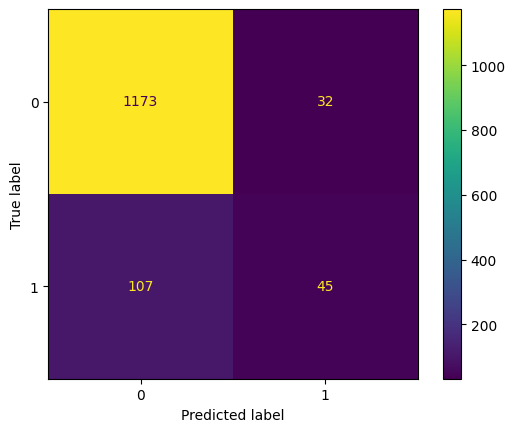

In [11]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)

In [12]:
# Oversampling caused accuracy to decrease
# Oversampling accuracy = 83%
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1205
           1       0.58      0.30      0.39       152

    accuracy                           0.90      1357
   macro avg       0.75      0.63      0.67      1357
weighted avg       0.88      0.90      0.88      1357



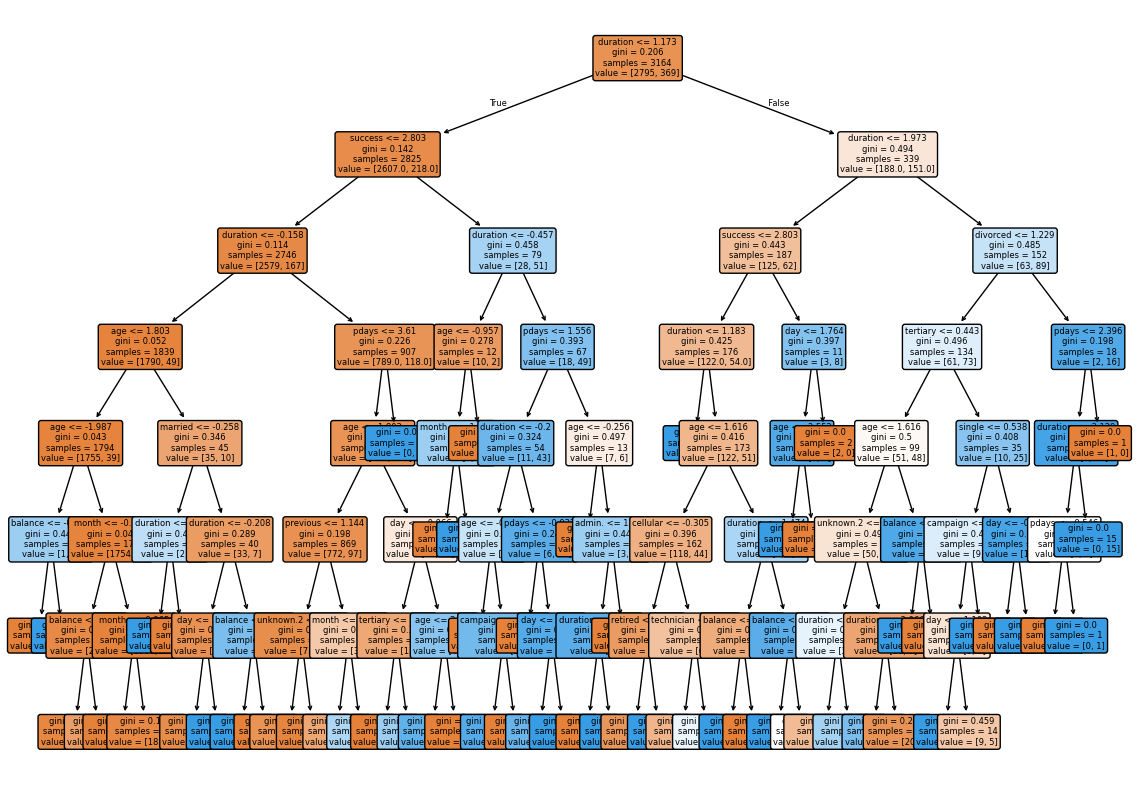

<Figure size 640x480 with 0 Axes>

In [18]:
from sklearn import tree
import matplotlib.pyplot as plt

model = tree.DecisionTreeClassifier(max_depth = 7, random_state = 42)
model = model.fit(X_train, y_train)


plt.figure(figsize=(14, 10))
tree.plot_tree(model, feature_names = list(X.columns), filled = True, fontsize = 6, rounded = True)

plt.show()
plt.savefig("tree.png")

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500'),
  Text(0, 4000.0, '4000'),
  Text(0, 4500.0, '4500')])

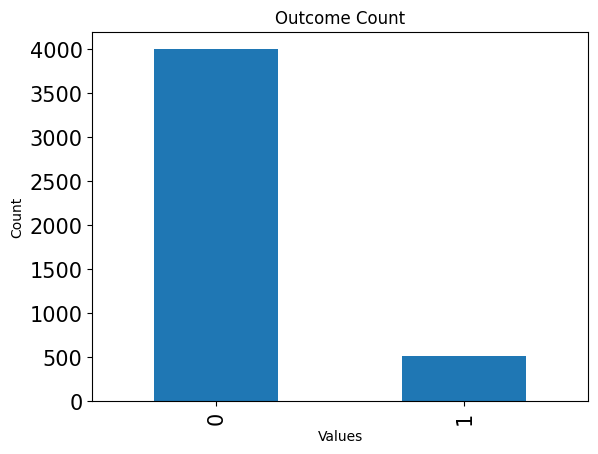

In [14]:
outcome_count = bank_df_full["y"].value_counts()
outcome_count.plot(kind="bar")
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Outcome Count')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

C:\Users\cjcra\AppData\Local\Temp\ipykernel_24508\535647856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df_relationship['contact'] = bank_df_relationship['contact'].map({'unknown':0, 'telephone':1,'cellular':2})
C:\Users\cjcra\AppData\Local\Temp\ipykernel_24508\535647856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df_relationship['month'] = bank_df_relationship['month'].map({'jan':1, 'feb':2,
C:\Users\cjcra\AppData\Local\Temp\ipykernel_24508\535647856.py:20: SettingWithCopyWarnin

<Axes: >

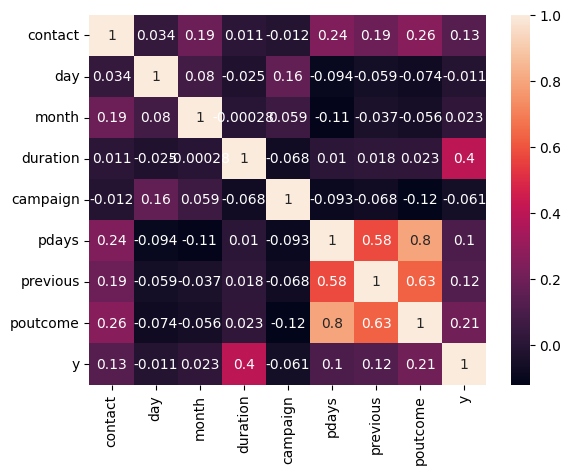

In [16]:
import seaborn as sns

bank_df = pd.read_csv('bank.csv', delimiter=';')

bank_df_relationship = bank_df[['contact','day','month','duration','campaign','pdays','previous','poutcome','y']]



def bank_relationship_standardizing():
    bank_df_relationship = bank_df[['contact','day','month','duration','campaign','pdays','previous','poutcome','y']]
    bank_df_relationship['contact'] = bank_df_relationship['contact'].map({'unknown':0, 'telephone':1,'cellular':2})

    bank_df_relationship['month'] = bank_df_relationship['month'].map({'jan':1, 'feb':2,
                                            'mar':3, 'apr':4,
                                            'may':5,'jun':6,
                                            'jul':7, 'aug':8,
                                            'sep':9,'oct':10,
                                            'nov':11,'dec':12})

    bank_df_relationship['poutcome'] = bank_df_relationship['poutcome'].map({'unknown':0,'other':1,'failure':2,'success':3})
    
    bank_df_relationship['y'] = bank_df_relationship['y'].map({'no':0, 'yes':1})
    
    return bank_df_relationship

bank_df_relationship =  bank_relationship_standardizing()

sns.heatmap(bank_df_relationship.corr(), annot = True)